# Bike Sharing Case Study

#### Problem Statement :

Consider a bike sharing system that has a dataset.You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.


The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

<b>So interpretation is important!</b>

The steps we will follow in this exercise are as follows-

1. Data Reading ,Understanding, Cleaning and Visualization
2. Preparing the data for modelling(train-test split, rescaling etc.)
3. Training the model
4. Residual Analysis
5. Predictions and Evaluations on the test set

## Step1: Reading , Understanding , Cleaning and Visualizing the data

### Data Reading and Understanding

In [1722]:
#Importing the Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split


# Suppress warnings

import warnings
warnings.filterwarnings('ignore')


In [1723]:
#To expand the output display to see more rows
pd.options.display.max_rows = None

#To expand the output display to see more columns
pd.options.display.max_columns = None

In [1724]:
#read the dataset
bike_data = pd.read_csv('day.csv')
bike_data.head()  

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- As 'cnt' variable indicates the total number of bike rentals, including both casual and registered.So we are building the model taking this 'cnt' as a target/dependent variable. 
- Therefore it's a problem based on Multiple linear regression as the target variable 'cnt' is numeric/continuous variable.


In [1725]:
#Checking the no. of rows and columns
bike_data.shape 

(730, 16)

In [1726]:
#summary of  a DataFrame 'bike_data'
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no missing values in each of these columns. So therefore imputation of null values is not required.

In [1727]:
#Statistical summary of a DataFrame 'bike_data'
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Also we can observe that min and max of these variables varies so therefore rescaling is required to be done. As these variables are not following proper scale.

## Data Cleaning

In [1728]:
#Shows top 5 rows
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1729]:
#Checking datatypes
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [1730]:
#dropping the unnecessary variables
bike_data = bike_data.drop(['instant','dteday','atemp','casual','registered'], axis = 1)

Reason of dropping variables-
 - instant : It's a record index , so we can drop that as it's not adding any value or significant in predicting the demand.
 - dteday : It's a date on which these no. of bikes rented. As predictors like season,yr, mnth, weekday, workingday , holiday, weathersit are more significant then just the date . As dteday is not providing more information like these mentioned predictors does.
 - atemp: It's a apparent/feels like temperature. As we already have actual temp , so in order to avoid redundancy we are good to drop this feature.
 - casual, registered: As given in the problem statement, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. So we are good to drop casual, registered variables.

In [1731]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


Check the datatype of all the columns and make necessary changes if required

In [1732]:
bike_data.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Identifying the categorical and numerical features- 
Since all are the numerical variables as far . So let's visualize the  numerical data using pairplot. As visualizing data by Graphical representation  before performing  statistical analysis is a crucial step.

## Data Visualization

Sort of 2 things we want to do -
1. <b>Basic Visualization</b> - First check a linear regression model makes sense or not, Traget variable demand(ie,cnt here) should be in some way linearly related to atleast some of the variables. So we will be checking scatter plots of cnt vs predictor variables and if none of them look linear at all then you can understand that the underlying distribution of cnt with relation to all the  variables is indeed not linear.

2. <b>Check multicollinearity</b> - By visualizing the data , check multicollinearity so you want to check any of the predictor variable is having high correlation with other variables if that is the case then you need to take care of the multicollinearity while you are building the model.

<Figure size 1440x864 with 0 Axes>

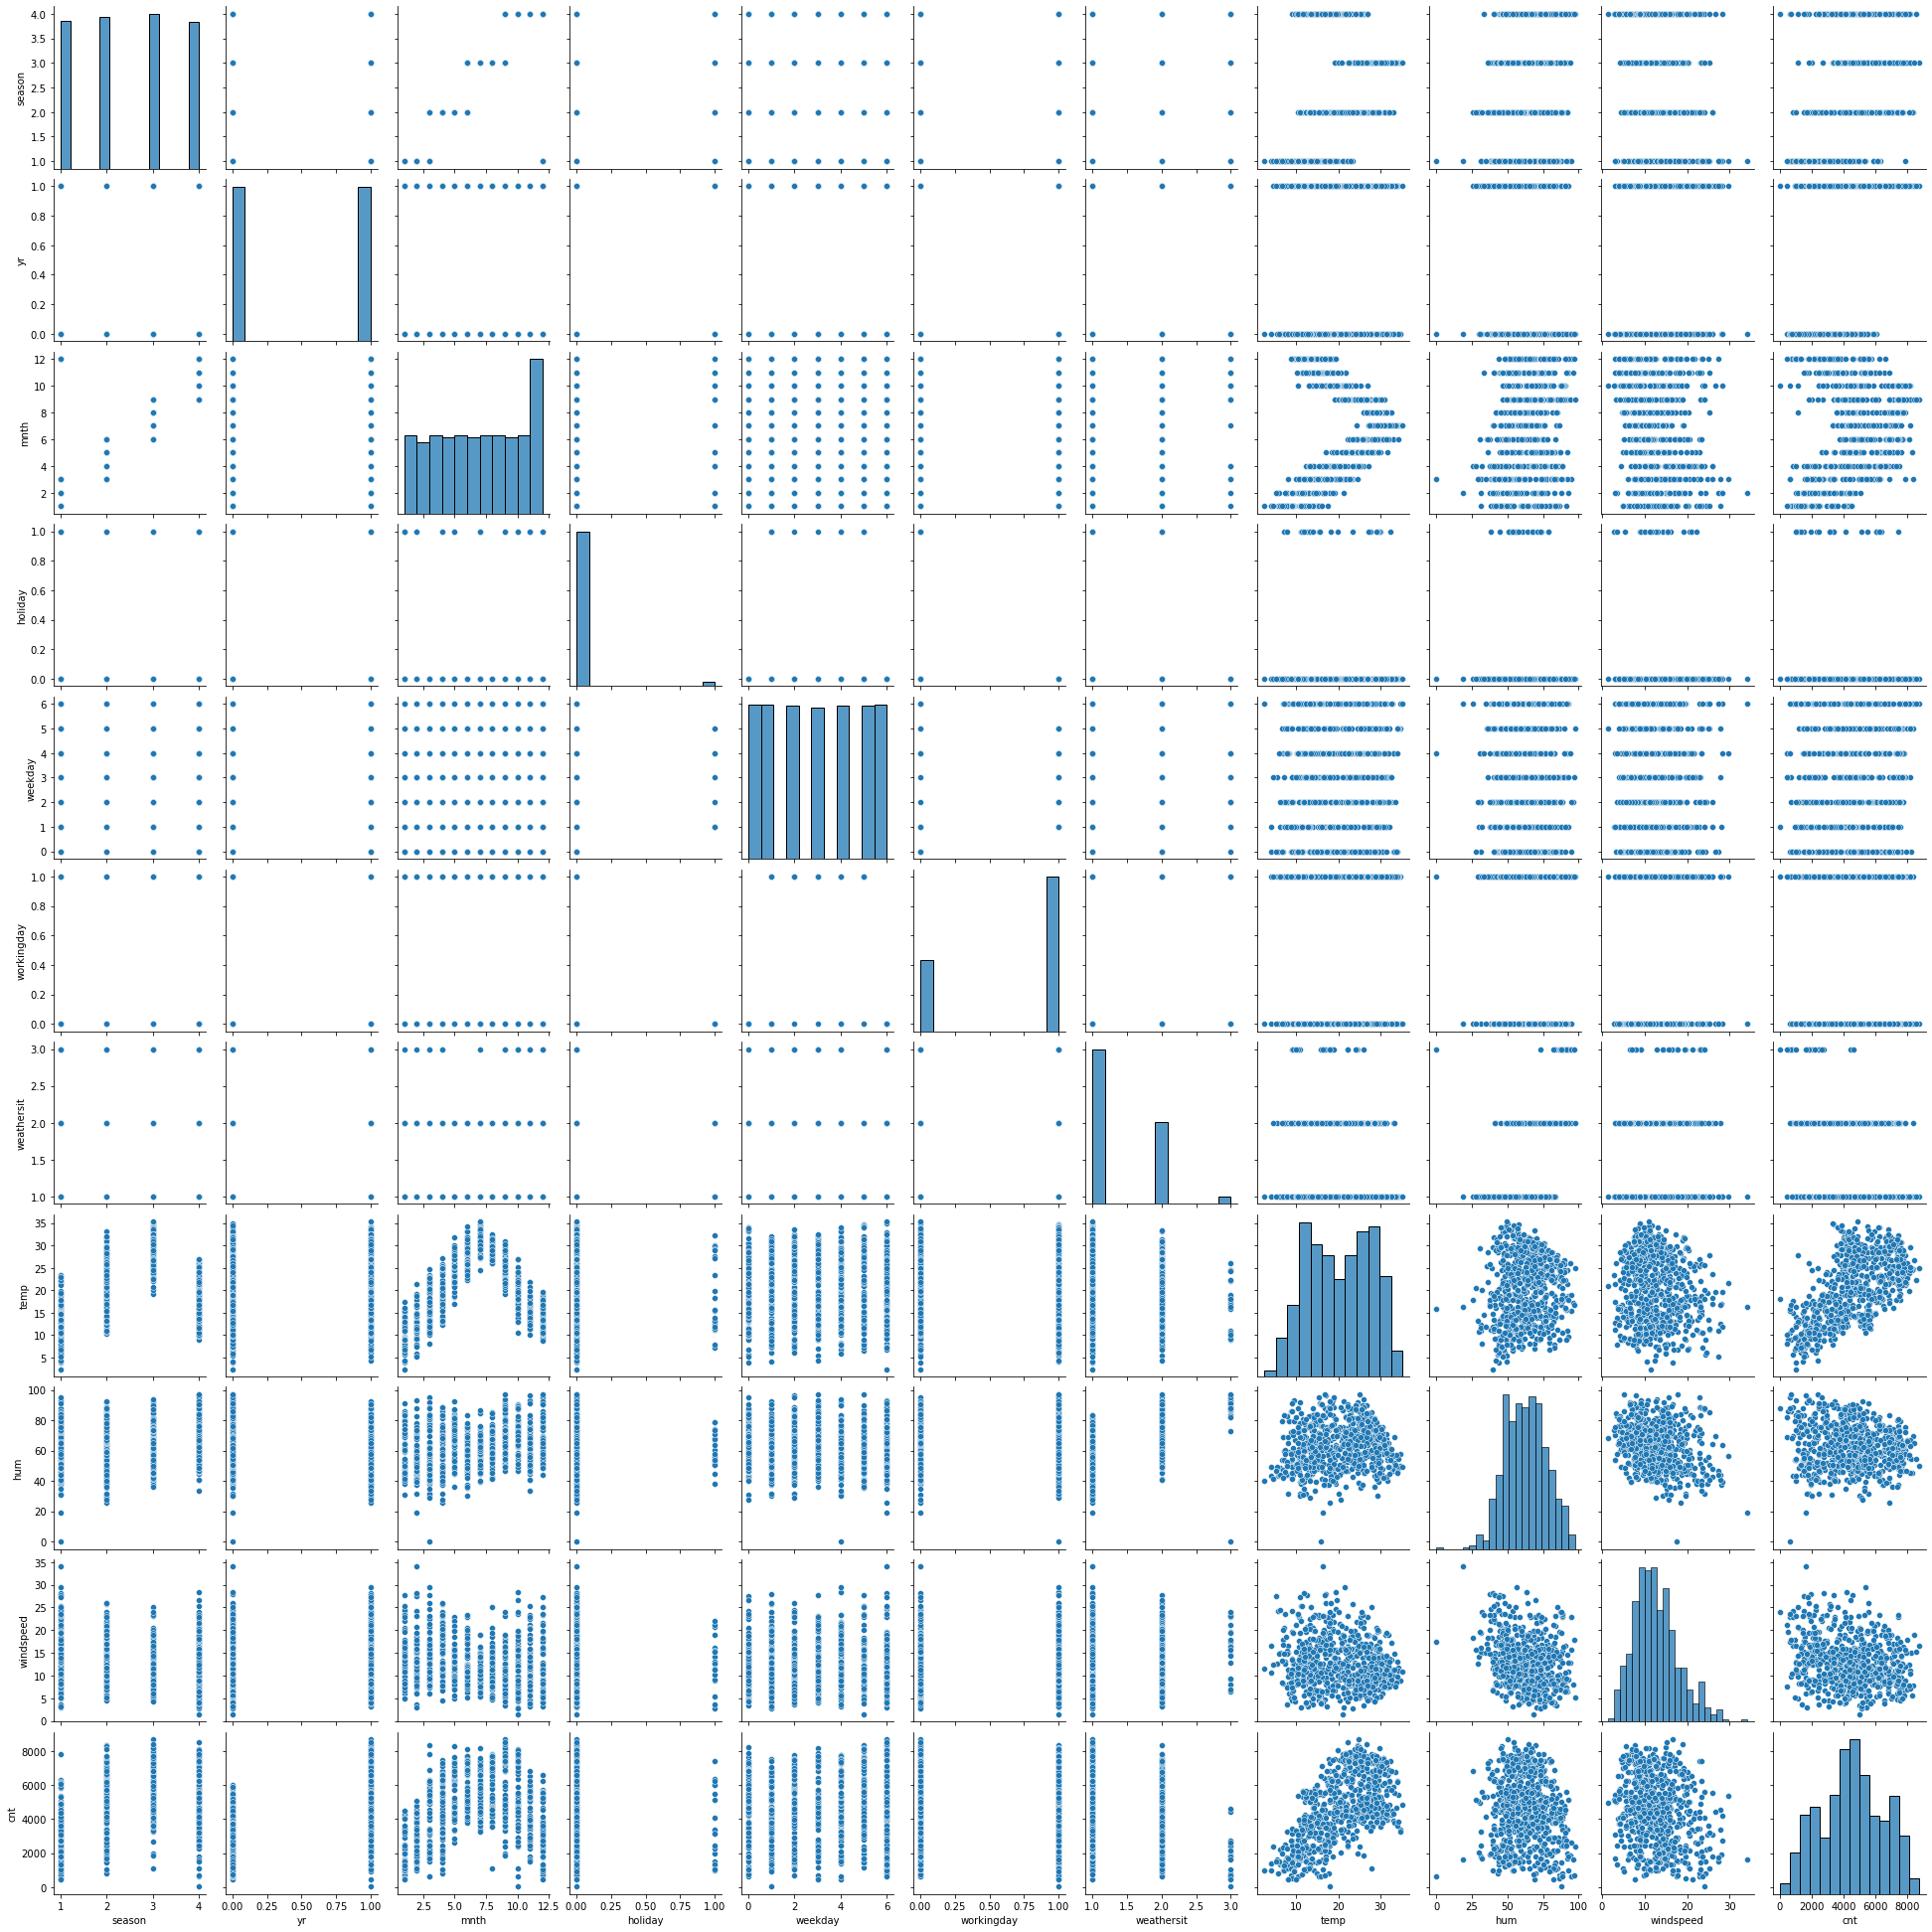

In [1733]:
#visualizing the pairs of numerical variables
plt.figure(figsize = (20,12))
sns.pairplot(bike_data)
plt.show()

<b>Assumption 1 </b>:Here We can observe clearly in the above plot that temp (X) is in linear relationship with target variable cnt (Y). Therefore from initial data visualization we can say that there is atleast one feature which is showing relationship with dependent variable demand(ie, cnt here)

In [1734]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


Converting dataypes of season, mnth, weekday, weathersit to categorical datatype in order to map the col. values with the data given in dictionary for better understanding

In [1735]:
#Changing datatypes to categorical
bike_data['season'] =bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data['mnth']=bike_data['mnth'].map({1:'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bike_data['weekday']=bike_data['weekday'].map({0:'Tue',1:'Wed',2:'Thur',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})

In [1736]:
bike_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,1,1,8.378268,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,1,2,8.057402,49.8696,11.304642,1510
7,spring,0,Jan,0,Mon,0,2,6.765000,53.5833,17.875868,959
8,spring,0,Jan,0,Tue,0,1,5.671653,43.4167,24.250650,822
9,spring,0,Jan,0,Wed,1,1,6.184153,48.2917,14.958889,1321


In [1737]:
bike_data['weathersit'] = bike_data['weathersit'].map({1:'Clear', 2:'Mist',3:'Light Snow',4:'Heavy Rain'})

In [1738]:
bike_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,1,Clear,8.378268,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,1,Mist,8.057402,49.8696,11.304642,1510
7,spring,0,Jan,0,Mon,0,Mist,6.765000,53.5833,17.875868,959
8,spring,0,Jan,0,Tue,0,Clear,5.671653,43.4167,24.250650,822
9,spring,0,Jan,0,Wed,1,Clear,6.184153,48.2917,14.958889,1321


In [1739]:
#Checking datatypes
bike_data.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

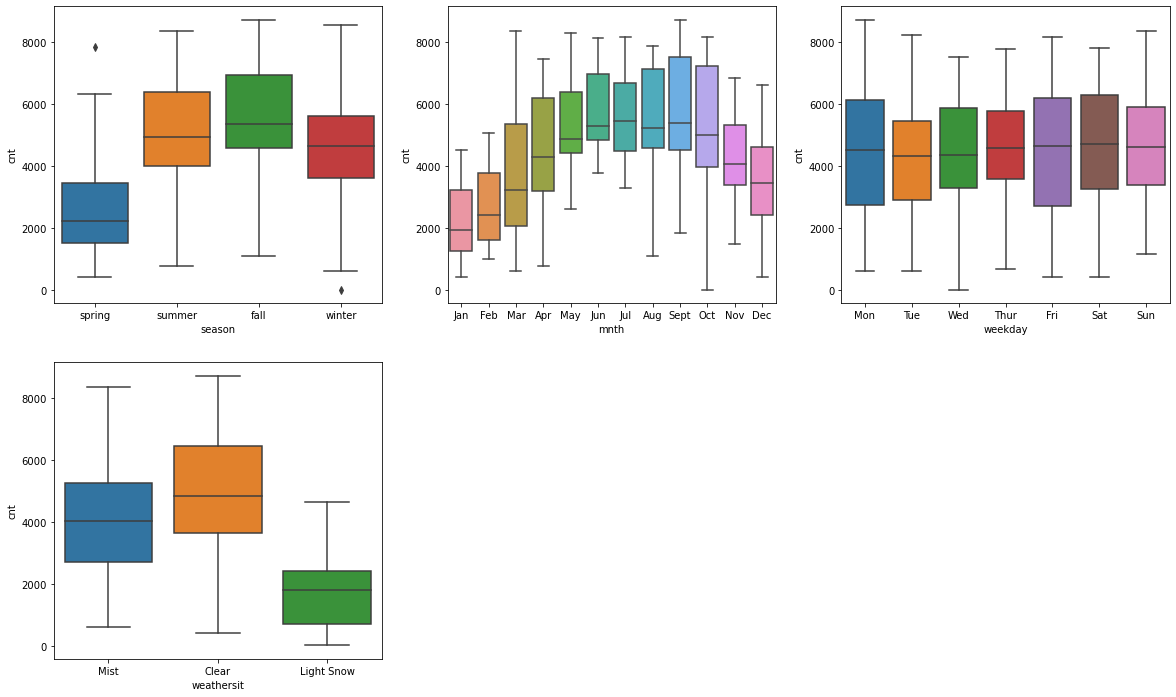

In [1740]:
#visualizing the categorical variables
#creating subplots
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y= 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y= 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x='weekday',y= 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x='weathersit',y= 'cnt', data = bike_data)

box-and-whisker-plots are a visual depiction of quartiles, dispersion, and spread in your data, and they have lines extending from the box to show the range of additional variablity outside of these quartiles. Moreover, they offer a way to compare variable levels or groups. They can also help highlight outliers.

We can observe 
1. From mnth vs cnt plot : 
  - Demand for bikes rises from 4000 to 7000 in the months of Apr- to -Oct. Then in winters there we can observe here that  there is fall in demand.
        
2. From season vs cnt plot: 
 - Demand for bikes rises from 4000 to 7000 mostly in summer and fall season .
       
3. From weekday vs cnt plot: 
 - We can see there is almost the equal demand for bikes (3500 - 6000) on all the weekdays.
      
4. From weathersit vs cnt plot: 
 - There is a high demand of bikes in Clear weather & Mist weather and low demand in light snow.


## Step2 : Preparing the data for modelling

- Encoding :
 - Other categorical vars to dummy vars
- Splitting into train and test
- Rescaling of variables

In [1741]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Dummy Variables

- The idea of dummy variable creation is to build 'n-1' variables from a categorical variable with n levels.

In [1742]:
bike_data.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [1743]:
#creating dummy variables for season
status_1 = pd.get_dummies(bike_data['season'])
status_1

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


Now you don't need four columns/variables. You can drop the fall column, as this type of season can be identified with just the last three columns where-

- 000 will correspond to fall
- 100 will correspond to spring
- 010 will correspond to summer
- 001 will correspond to winters

In [1744]:
# dropping a redundant dummy var
status_1 = pd.get_dummies(bike_data['season'],drop_first = True)

In [1745]:
status_1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1746]:
# concat the dummy df with the original one
bike_data = pd.concat([bike_data,status_1],axis = 1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [1747]:
#creating dummy variables for mnth
status_2 = pd.get_dummies(bike_data['mnth'])
status_2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0


Now you don't need 12 columns/variables. You can drop the Apr column, as this type of mnth can be identified with just the last 11 columns where-

- 000...11 times*0 will correspond to Apr
- 100...10 times*0 will correspond to Aug
- 010...9 times*0 will correspond to Dec
- 001...8 times*0 will correspond to Feb
- 0001...7 times*0 will correspond to Jan
- 00001...6 times*0 will correspond to Jul
- 000001...5 times*0 will correspond to Jun
- 0000001...4 times*0 will correspond to Mar
- 00000001...3 times*0 will correspond to May
- 000000001...2 times*0 will correspond to Nov
- 0000000001...1 times*0 will correspond to Oct
- 00000000001 will correspond to Sept


In [1748]:
# dropping a redundant dummy var
status_2 = pd.get_dummies(bike_data['mnth'],drop_first = True)
status_2.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [1749]:
# concat the dummy df with the original one
bike_data = pd.concat([bike_data,status_2],axis = 1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1750]:
#creating dummy variables for weekday
status_3 = pd.get_dummies(bike_data['weekday'])
status_3

,Fri,Mon,Sat,Sun,Thur,Tue,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0
8,0,0,0,0,0,1,0
9,0,0,0,0,0,0,1


Now you don't need 7 columns/variables. You can drop the Fri column, as this type of weekday can be identified with just the last 6 columns where-

- 000000 will correspond to Fri
- 100000 will correspond to Mon
- 010000 will correspond to Sat
- 001000 will correspond to Sun
- 000100 will correspond to Thur
- 000010 will correspond to Tue
- 000001  will correspond to Wed

In [1751]:
# dropping a redundant dummy var
status_3 = pd.get_dummies(bike_data['weekday'],drop_first = True)
status_3.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [1752]:
# concat the dummy df with the original one
bike_data = pd.concat([bike_data,status_3],axis = 1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1753]:
#creating dummy variables for weekday
status_4 = pd.get_dummies(bike_data['weathersit'])
status_4

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,0,1
7,0,0,1
8,1,0,0
9,1,0,0


Now you don't need 3 columns. You can drop the Clear column, as the type of weathersit can be identified with just the last 2 columns where-

- 00 will correspond to Clear
- 10 will correspond to Light
- 01 will correspond to Mist

In [1754]:
# dropping a redundant dummy var
status_4 = pd.get_dummies(bike_data['weathersit'],drop_first = True)
status_4.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [1755]:
# concat the dummy df with the original one
bike_data = pd.concat([bike_data,status_4],axis = 1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1756]:
#dropping season variable as it's highly correlated with dummy variables created from the season variable 
bike_data = bike_data.drop('season',axis = 1)
bike_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist
0,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1757]:
#dropping mnth variable as it's highly correlated with dummy variables created from the mnth variable
bike_data = bike_data.drop('mnth',axis = 1)
bike_data.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist
0,0,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,Tue,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1758]:
#dropping weekday variable as it's highly correlated with dummy variables created from the weekday variable
bike_data = bike_data.drop('weekday',axis = 1)
bike_data.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist
0,0,0,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1759]:
#dropping weathersit variable as it's highly correlated with dummy variables created from the weathersit variable
bike_data = bike_data.drop('weathersit',axis = 1)
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- Always drop variable one by one.

In [1760]:
bike_data.shape

(730, 29)

### Splitting into train and test

In [1812]:
#Splitting 70% of data into train set and 30% of data into test set.
df_train, df_test = train_test_split(bike_data, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the features

We will use MinMax scaling.
- As rescaling doesn't change the shape or distribution of the variable , it just scale or shifts them so that the relationship this variable had with the output variable will remain same because distribution is not affected only the scale of variable is being affected.
- This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [1762]:
#transform features by scaling each feature to a given range.
#Importing package
from sklearn.preprocessing import MinMaxScaler

#Instantiate an object
scaler = MinMaxScaler()

In [1813]:
# Apply scaler() to all the columns except the 0/1 and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

#Fit to data, then transform it.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Step 3: Training the model

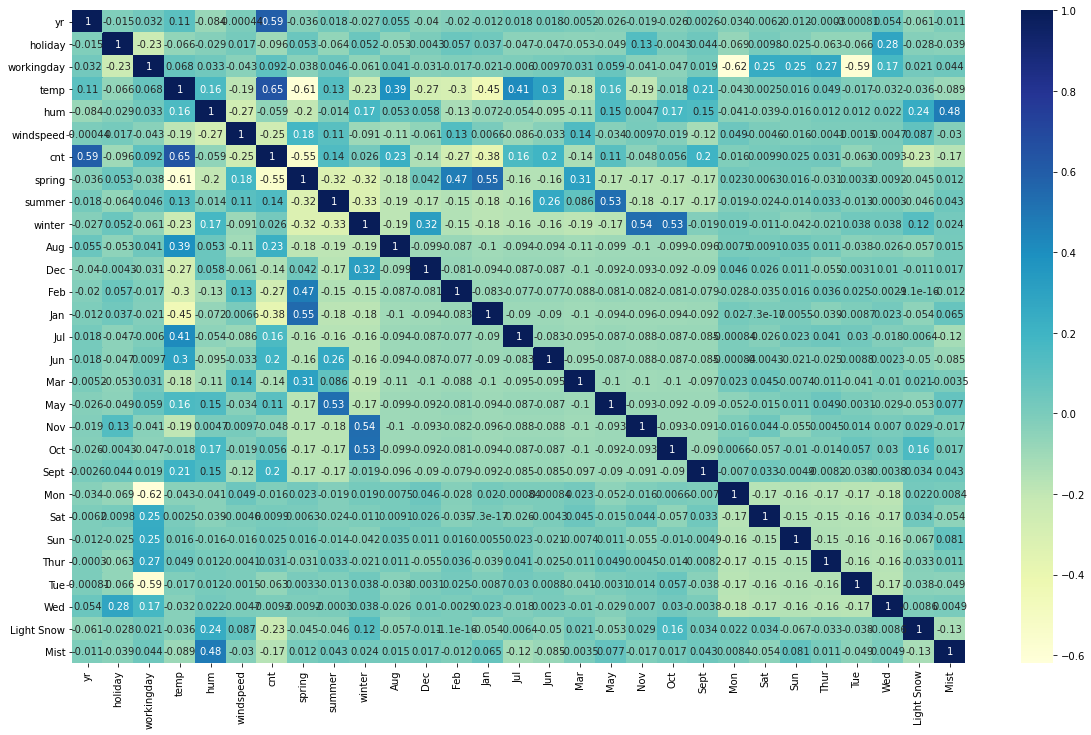

In [1816]:
#heatmap
plt.figure(figsize = (20,12))
sns.heatmap(df_train.corr(),annot = True, cmap= 'YlGnBu')
plt.show()

Here we can observe predictors vs cnt from above correlation graph - heatmap
- Positively correlated:  yr, temp,summer, winter
- Negatively correlated: windspeed, holiday

- Since spring(r=-0.55) is negatively correlated with cnt but we will not consider it because temp and spring are related predictors(multicollinearity issue) . As temp(r=0.65) is already with high correlation coefficient so we will choose temp instead.

- Since Aug (r = 0.23),Jul(r = 0.16), Jun(r = 0.2),  May ( r = 0.11) , Sept (r = 0.2)is positively correlated with cnt but we will not consider it because temp and spring are related predictors(multicollinearity issue) . As temp(r=0.65) is already with high correlation coefficient so we will choose temp instead. So we should drop Aug, Jul, Jun, May, Sept and consider temp.


- Since Dec(r= - 0.14), Jan(r= -0.27), Feb(r= -0.38) negatively correlated with cnt but we will not consider it because temp and spring are related predictors(multicollinearity issue) . As temp(r=0.65) is already with high correlation coefficient so we will choose temp instead. So we should drop Dec, Jan, Feb and consider temp.
 
- Mar (r = -0.14) correlated with cnt but we will not consider because it's a related predictor with predictor spring and spring is already related predictor with temp. So we should drop Mar.

- Nov (r = -0.048), Oct (r = 0.056) correlated with cnt but we will not consider because it's related with predictor spring and spring is multicollinear with winter. Since both Nov, Oct are included in winter , so instead of taking two predictors , we will take 1 predictor ie, winter (0.023) wrt cnt. So we should drop Nov, Oct.

- Mon (r = -0.0160) , Sat (r = 0.00990), Sun (r = 0.025), Thur (r = 0.031) , Tue (r = -0.063) correlated with cnt but we will not consider because it's related with predictor workingday . Since Mon, Sat, Sun, Thur are related with variable predictor , so instead of taking 4 variables , we will take just 1  variable workingday which  contribute it's  variance in cnt. So we should drop Mon, Sat, Sun, Thur, Tue.

- holiday ( r = -0.0960) correlated with cnt. Not related predictor with any other features . So we have to consider it.

- Wed (r = 0.0093) correlated with cnt but we will not consider because it's related with predictor workingday (r = 0.092) and workingday correlation coeff is greater than Wed wrt to cnt. So we should drop Wed.

- hum(r = -0.059) correlated with cnt but we will not consider because it's related with predictor Light Snow(r = -0.23)and Light snow correlation coeff is greater than hum wrt to cnt. So we should drop hum.

- Mist (r = -0.17) correlated with hum and hum is related predictor to Light now. So we should drop Mist as well.

### Dividing into X and Y sets for the model building

In [1765]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model


This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)
RFE - Recursive Feature Elimination

In [1766]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1814]:
#Running RFE with the output number of the variable
# Create linear regression object
lm= LinearRegression()

## fit the model on all available data
lm.fit(X_train,y_train)

rfe = RFE(lm,10) #running RFE

# Train the model using the training sets
rfe = rfe.fit(X_train,y_train)

RFE is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [1768]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 17),
 ('Mar', False, 19),
 ('May', False, 10),
 ('Nov', False, 7),
 ('Oct', False, 16),
 ('Sept', True, 1),
 ('Mon', False, 4),
 ('Sat', False, 18),
 ('Sun', False, 15),
 ('Thur', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist', False, 3)]

In [1769]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'Jul',
       'Sept', 'Light Snow'],
      dtype='object')

In [1770]:
X_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'Mist'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [1771]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1772]:
#Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [1817]:
#Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()   

OLS - Ordinary Least Square estimators minimize the sum of the squared errors (a difference between observed values and predicted values) and we would like to pick that straight line which is having Beta parameters  and we would like to pick those best possible values of Beta so that RSS(Residual sum of squares) is minimized

In [1774]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.79e-186
Time:                        15:05:17   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.0

Here R-squared is 0.832 . It means 83% of variance in price is explained by area which is pretty good.

To drop the features we have to check below two-

- significance(p-values)
- VIF

Here significance(p-values) are 0.00 for all variables which is indicating that variables are all significant but we will be check by VIF also.

## VIF

Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖=1/1−𝑅𝑖^2

Example for VIF explaination:

5 = 1/(1-r2)
1-r2 = 0.2
r2 = 0.8

r-squared of a variable when predicted by other variable is 0.8. If you take cnt as a target and other variable as predictor variable then it means all the 80% of variance in cnt is explained by all the other variables.

Value greater than VIF = 5 is pretty high because that's correspond to r-squared greater than 80%

In [1775]:
#Importing statsmodels and sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [1776]:
#create a df that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,40.19
3,temp,1.53
8,Jul,1.43
6,summer,1.33
7,winter,1.28
4,hum,1.26
9,Sept,1.19
5,windspeed,1.16
10,Light Snow,1.11
1,yr,1.03


We could have :
So this is the basic procedure that we are going to follow

- High p-value, high VIF
- High-low :
      - High p,low vif : remove these type of variables first
      - low p, high vif : remove these after the ones above
- low p, low VIF       

In [1777]:
X_train_new  = X_train_rfe.drop(['const'],axis = 1)

In [1778]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'Jul',
       'Sept', 'Light Snow'],
      dtype='object')

##### Rebuilding the model

In [1779]:
X_train_lm_1 = sm.add_constant(X_train_new)
lm_1 = sm.OLS(y_train, X_train_lm_1).fit()          #Running the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.79e-186
Time:                        15:05:17   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.0


Here significance(p-values) are all less than 0.05 for all variables which is indicating that variables are all significant but we will be check by VIF also.

In [1780]:
#create a df that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,summer,1.76
6,winter,1.68
7,Jul,1.55
8,Sept,1.29
9,Light Snow,1.09
1,holiday,1.04


Here VIF of feature hum is greater than , so we will drop hum variable now from the X_train_new set

In [1781]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'Jul',
       'Sept', 'Light Snow'],
      dtype='object')

In [1782]:
X_train_new.shape

(510, 10)

In [1783]:
X_train_new  = X_train_new.drop(['hum'],axis = 1)

In [1784]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter', 'Jul', 'Sept',
       'Light Snow'],
      dtype='object')

#### Rebuilding the model

In [1785]:
X_train_lm_2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train, X_train_lm_2).fit()          #Running the linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          4.42e-171
Time:                        15:05:17   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0840      0.018      4.794      0.0

Here significance(p-values) are all less than 0.05 except Jul (p= 0.115) for all variables which is indicating that Jul is insignificant but we will be check VIF also.

In [1786]:
#create a df that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,summer,1.75
6,Jul,1.51
5,winter,1.43
7,Sept,1.28
8,Light Snow,1.06
1,holiday,1.03


Here VIF of all features are less than 5 but significance (p-value) of Jul is greater than 0.05 so we will drop Jul.

In [1787]:
X_train_new  = X_train_new.drop(['Jul'],axis = 1)

In [1788]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter', 'Sept',
       'Light Snow'],
      dtype='object')

#### Rebuilding the model

In [1789]:
X_train_lm_3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train, X_train_lm_3).fit()          #Running the linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          9.22e-172
Time:                        15:05:18   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.017      5.029      0.0

Here significance(p-values) are 0.00 for all variables which is indicating that variables are all significant but we will be check by VIF also.

<b>Interpretations from above summary</b>
- coef and p-value ( which is P>|t|)
- R-squared is 80.4% , very high which is good fit
- R-squared is about 0.804 which means that the model is able to explain 80.4% of the variance which is pretty good.
- p(F-statistic) is low => the fit is not by chance

In [1790]:
#create a df that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,summer,1.55
5,winter,1.34
6,Sept,1.20
7,Light Snow,1.06
1,holiday,1.03


In [1791]:
X_train_new.shape

(510, 8)

## Step4 : Residual Analysis

In [1792]:
#Make predictions
y_train_predict= lm_3.predict(X_train_lm_3)
y_train_predict

576    0.745645
426    0.535189
728    0.363765
482    0.599516
111    0.309756
580    0.773504
500    0.785935
479    0.673815
472    0.649012
455    0.621100
636    0.820812
224    0.478345
458    0.700389
244    0.560123
627    0.731922
595    0.715473
140    0.528892
454    0.595416
162    0.579192
231    0.520065
688    0.657440
659    0.738070
696    0.562506
320    0.331366
534    0.814539
136    0.450973
568    0.774070
474    0.699496
206    0.542619
427    0.418387
288    0.459124
447    0.668965
259    0.437182
174    0.502180
267    0.707706
327    0.310296
402    0.496992
590    0.753919
609    0.855043
704    0.544875
376    0.506548
365    0.494195
15     0.163986
656    0.775038
639    0.550551
470    0.667974
561    0.781433
680    0.620849
591    0.739566
240    0.459681
597    0.729192
718    0.610613
115    0.485164
565    0.698397
154    0.551124
471    0.718613
241    0.472340
552    0.851254
651    0.700609
384    0.382912
315    0.371165
484    0.648438
354    0

In [1826]:
print(X_train_new.shape,y_train.shape,y_train_predict.shape)

(510, 8) (510,) (510,)


In [1827]:
#plt.scatter(X_train_new, y_train)
#plt.plot(X_train_new, y_train_predict, 'r')

In [1793]:
#Importing package
from sklearn.metrics import mean_squared_error

#Mean Squared Error
mse = mean_squared_error(y_train, y_train_predict)
#R_squared
r_squared= r2_score(y_true =y_train , y_pred= y_train_predict)

- mse - The mean squared error tells you how close a regression line is to a set of points. It is always non – negative and values close to zero are better. 

- r_squared - For accuracy of this prediction another mathematical tool is used, which is R-squared Regression Analysis or the coefficient of determination. The value of R-squared is between 0 and 1. And if the coefficient of determination is 1 (or 100%) means that prediction of the dependent variable has been perfect and accurate.


In [1794]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.009862020953583874
r_square_value : 0.8038032148021996


<AxesSubplot:ylabel='Density'>

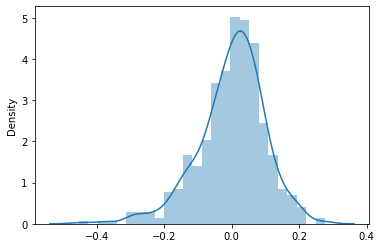

In [1795]:
#Residual error
res = y_train - y_train_predict
sns.distplot(res)

##### Assumption2 -We got the normal distribution of error terms with mean 0 which we have assumed. Therefore the residuals are following with mean 0

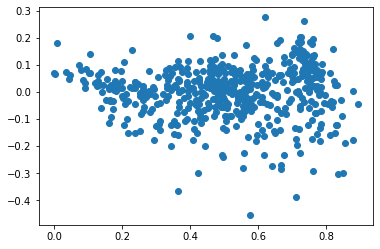

In [1796]:
#look for patterns in residuals( we should not be able to identify the pattern)
plt.scatter(y_train_predict, res)
plt.show() 

#### Assumption 3- the residuals are scattered around the 0 on Y-axis and there is no identifiable patterns and clusters which indicates that residuals are normally distributed. Infact towards the right part of the plot the variance is quite high along the y-axis which is quite far away from y= 0

#### This signifies the model is fit


## Step5 : Predictions and Evaluations on the test set

- pre-processing (rescaling and transformations ) is must of a features before predictions- 

In [1797]:
# create list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']

#Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1798]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the min - max values of numeric variables are lying between 0 and 1 now.

In [1799]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1800]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1801]:
X_test_sm = X_test_sm.drop(['hum','Jul', 'workingday', 'spring', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'Mist'],axis = 1)

In [1802]:
# Make prediction using testing set
y_test_pred = lm_3.predict(X_test_sm)

In [1803]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
r_squared= r2_score(y_true =y_test , y_pred= y_test_pred)

In [1804]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.010898155963642084
r_square_value : 0.7720731949554799


In [1819]:
#Checking shape of test X and Y variables
print(X_test.shape, y_test.shape, X_test.shape, y_test_pred.shape)

(220, 28) (220,) (220, 28) (220,)


Text(0, 0.5, 'Demand')

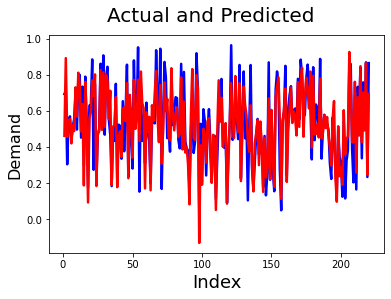

In [1805]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Demand', fontsize=16)                               # Y-label

Text(0, 0.5, 'y_test-y_test_pred')

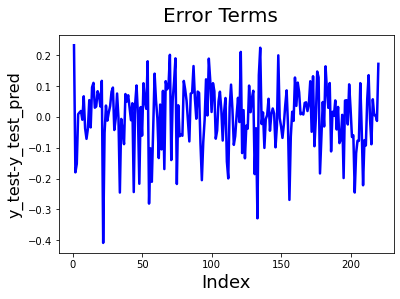

In [1806]:
# Error terms
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test-y_test_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test-y_test_pred', fontsize=16)                # Y-label

<AxesSubplot:ylabel='Density'>

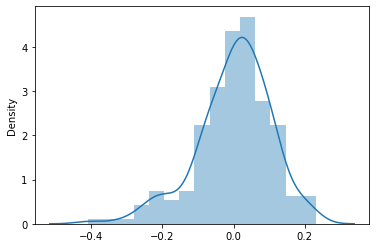

In [1821]:
#Error terms plot
res = y_test - y_test_pred
sns.distplot(res)

We got the normal distribution of error terms with mean 0 which we have assumed. Therefore the residuals are following with mean 0

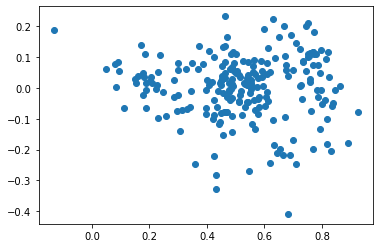

In [1823]:
#look for patterns in residuals( we should not be able to identify the pattern)
plt.scatter(y_test_pred, res)
plt.show() 

Here we can observe the residuals are scattered around the 0 on Y-axis and there is no identifiable patterns.

## Step :Model Evaluation

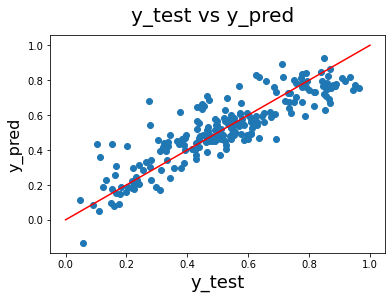

In [1831]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.plot( [0,1.0],[0,1.0], color='red')

We can see the equation of our best fitted line is:

cnt = 0.2334×yr-0.0867×holiday+0.5682×temp-0.1455×windspeed+0.0812×summer+0.1261×winter+0.0895×Sept-0.2535×Light Snow

In [1810]:
r_squared_train= r2_score(y_true =y_train , y_pred= y_train_predict)
print(round(r_squared_train,2))

0.8


In [1811]:
r_squared_test= r2_score(y_true =y_test , y_pred= y_test_pred)
print(round(r_squared_test,2))

0.77


Here we can observe , the difference between r_squared on train set(r_squared_train) & r_squared on test set(r_squared_test) is 0.03 ie, 3% which is less than 5% . So this shows that our model is best fit.

- Which variables are significant in predicting the demand for shared bikes?
  
  - temp, Light Snow are the two topmost significant in predicting the demand.
  - Below is the list of significant variables in descending order based on absolute values of Beta coefficient in the above linear equation.
    - Temp
    - Light Snow
    - yr
    - windspeed
    - winter
    - Sept
    - holiday
    - summer



- How well those variables describe the bike demands
  - Accuracy is determine by R-squared = 0.804 . This indicates that 80% of variance in target variable demand(cnt) is explained by independent variables/predictors.